<a href="https://colab.research.google.com/github/JaiRamteke/Medical_Inferences_Using_K-means/blob/main/Medical_Inferences_Using_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import matplotlib . pyplot as plt
import numpy as np
from sklearn . cluster import KMeans
from PIL import Image
! pip install pydicom
import pydicom

In [21]:
dicom_path = '/content/swi_tra_p2_448_1800000004191561.dcm'
dataset = pydicom.dcmread(dicom_path)
img_array = dataset.pixel_array.astype(float)

# Normalize the image (Scale values between 0 and 1)
img_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))

# Normalize the image ( Scale values between 0 and 1)
img_array = ( img_array - np .min( img_array )) / ( np . max ( img_array ) - np . min ( img_array ))

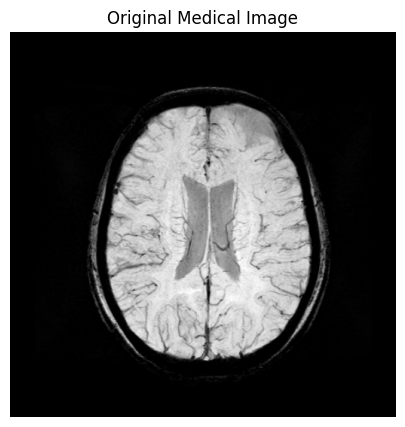

In [22]:
plt.figure(figsize=(10, 5))
plt.imshow(img_array, cmap='gray')
plt.title("Original Medical Image")
plt.axis('off')
plt.show()

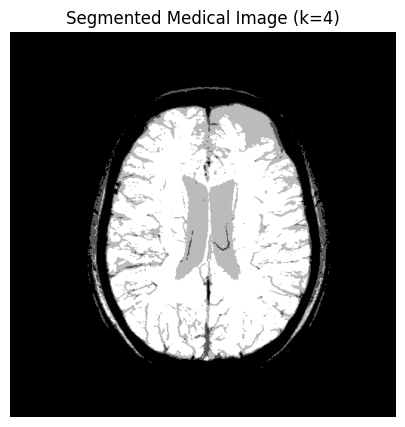

In [24]:
h , w = img_array . shape
pixels = img_array . reshape (h * w , 1) # Convert image into a list of pixel intensities

# Define number of clusters
k = 4
kmeans = KMeans ( n_clusters =k , random_state =42 , n_init =10)
labels = kmeans . fit_predict ( pixels )

# Reshape back to original image dimensions
segmented_image = kmeans . cluster_centers_ [ labels ]. reshape (h , w )

h, w = img_array.shape
pixels = img_array.reshape(h * w, 1) # Convert image into a list of pixel intensities

# Define number of clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(pixels)

# Reshape back to original image dimensions
segmented_image = kmeans.cluster_centers_[labels].reshape(h, w)

# Display the segmented image
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image, cmap='gray')
plt.title(f"Segmented Medical Image (k={k})")
plt.axis('off')
plt.show()

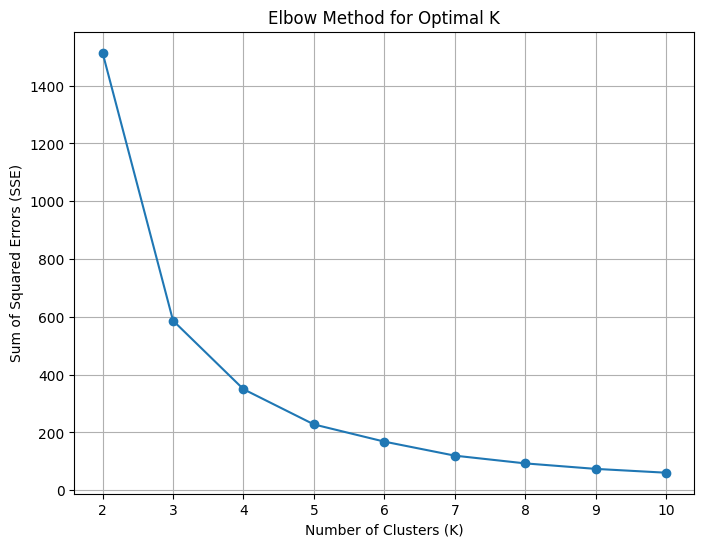

In [27]:
sse = []
k = range (2 , 11)

for k_elbow in k:
    kmeans_elbow = KMeans ( n_clusters = k_elbow , random_state =42 , n_init =10)
    kmeans_elbow . fit ( pixels )
    sse.append ( kmeans_elbow . inertia_ )

sse = []
k = range(2, 11)

for k_elbow in k:
    kmeans_elbow = KMeans(n_clusters=k_elbow, random_state=42, n_init=10)
    kmeans_elbow.fit(pixels)
    sse.append(kmeans_elbow.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k, sse, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.xticks(k)
plt.grid(True)
plt.show()

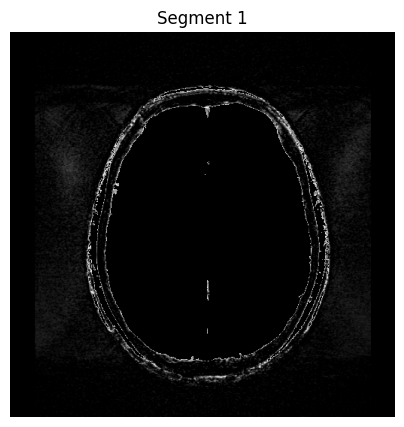

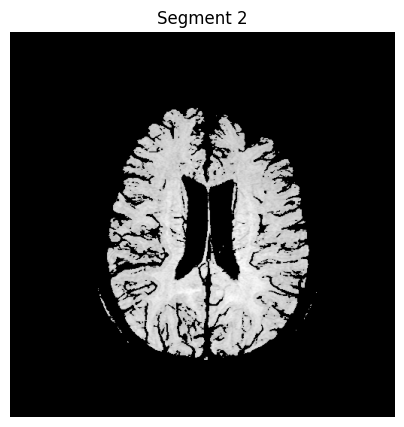

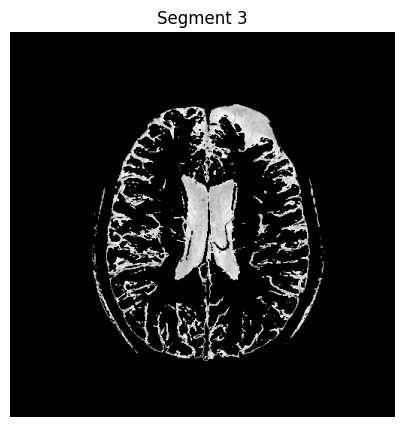

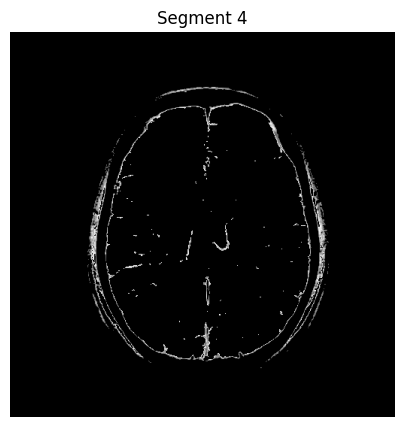

In [29]:
for i in range ( kmeans . n_clusters ):
    cluster_mask = ( labels . reshape (h , w) == i)
for i in range(kmeans.n_clusters):
    cluster_mask = (labels.reshape(h, w) == i)
    segment = img_array * cluster_mask
    plt.figure(figsize=(5, 5))
    plt.imshow(segment, cmap='gray')
    plt.title(f"Segment {i + 1}")
    plt.axis('off')
    plt.show()